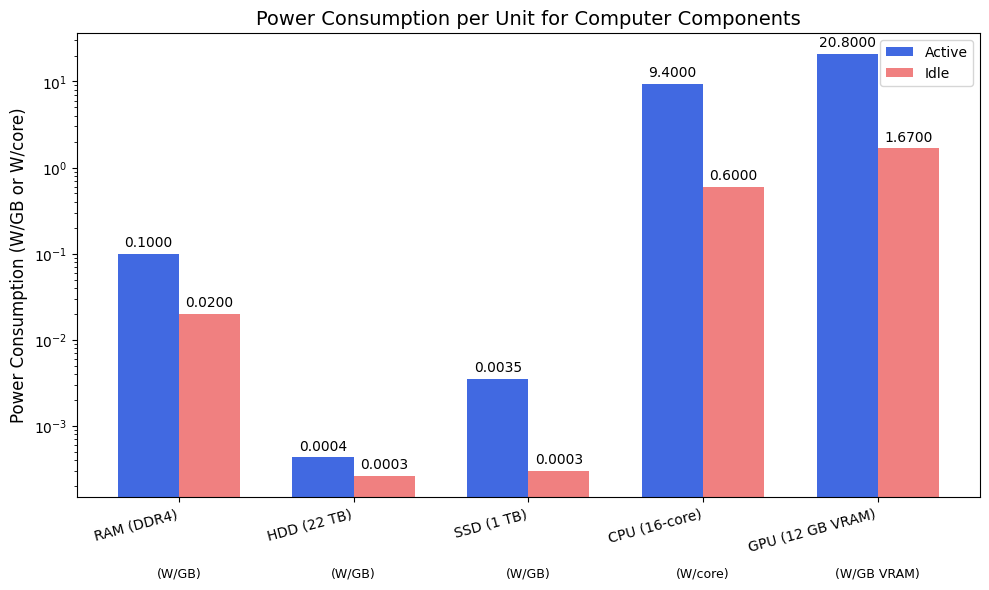

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
components = ['RAM (DDR4)', 'HDD (22 TB)', 'SSD (1 TB)', 'CPU (16-core)', 'GPU (12 GB VRAM)']
active_power = [0.1, 0.00043, 0.0035, 9.4, 20.8]  # W/GB for RAM, HDD, SSD; W/core for CPU; W/GB VRAM for GPU
idle_power = [0.02, 0.00026, 0.0003, 0.6, 1.67]
units = ['W/GB', 'W/GB', 'W/GB', 'W/core', 'W/GB VRAM']  # Different units for clarity

# Plotting
x = np.arange(len(components))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, active_power, width, label='Active', color='royalblue')
bars2 = ax.bar(x + width/2, idle_power, width, label='Idle', color='lightcoral')

# Log scale for better visualization
ax.set_yscale('log')
ax.set_ylabel('Power Consumption (W/GB or W/core)', fontsize=12)
ax.set_title('Power Consumption per Unit for Computer Components', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(components, rotation=15, ha='right')
ax.legend()

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

# Add unit annotations below x-axis labels
for i, unit in enumerate(units):
    ax.text(i, -0.15, f'({unit})', ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=9)


plt.tight_layout()
plt.savefig('power_consumption_chart.png', dpi=300)
plt.show()